## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
from keras.layers import BatchNormalization, Activation
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 12, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
for batch_size_num in BATCH_SIZE:
    keras.backend.clear_session()
    print('BATCH_SIZE='+str(batch_size_num))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size_num, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = 'BATCH_SIZE='+str(batch_size_num)
    results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
    


BATCH_SIZE=2
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________

50000/50000 [==============================] - 294s 6ms/step - loss: 2.2401 - acc: 0.1669 - val_loss: 2.6021 - val_acc: 0.2093
Epoch 46/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2432 - acc: 0.1635 - val_loss: 3.0066 - val_acc: 0.2046
Epoch 47/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2452 - acc: 0.1626 - val_loss: 3.0187 - val_acc: 0.1979
Epoch 48/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2481 - acc: 0.1634 - val_loss: 2.8485 - val_acc: 0.2098
Epoch 49/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2464 - acc: 0.1646 - val_loss: 2.8936 - val_acc: 0.1671
Epoch 50/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2539 - acc: 0.1608 - val_loss: 3.0962 - val_acc: 0.1752
BATCH_SIZE=12
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (No

50000/50000 [==============================] - 50s 1ms/step - loss: 1.2529 - acc: 0.5554 - val_loss: 1.3262 - val_acc: 0.5311
Epoch 44/50
50000/50000 [==============================] - 50s 1ms/step - loss: 1.2467 - acc: 0.5596 - val_loss: 1.3696 - val_acc: 0.5157
Epoch 45/50
50000/50000 [==============================] - 50s 1ms/step - loss: 1.2496 - acc: 0.5590 - val_loss: 1.3226 - val_acc: 0.5290
Epoch 46/50
50000/50000 [==============================] - 50s 1ms/step - loss: 1.2433 - acc: 0.5588 - val_loss: 1.3480 - val_acc: 0.5223
Epoch 47/50
50000/50000 [==============================] - 50s 1ms/step - loss: 1.2395 - acc: 0.5619 - val_loss: 1.3779 - val_acc: 0.5187
Epoch 48/50
50000/50000 [==============================] - 50s 1ms/step - loss: 1.2394 - acc: 0.5604 - val_loss: 1.3622 - val_acc: 0.5174
Epoch 49/50
50000/50000 [==============================] - 50s 1ms/step - loss: 1.2337 - acc: 0.5644 - val_loss: 1.3633 - val_acc: 0.5152
Epoch 50/50
50000/50000 [=====================

50000/50000 [==============================] - 20s 404us/step - loss: 0.8426 - acc: 0.6981 - val_loss: 1.5879 - val_acc: 0.4959
Epoch 42/50
50000/50000 [==============================] - 20s 405us/step - loss: 0.8399 - acc: 0.7000 - val_loss: 1.4764 - val_acc: 0.5274
Epoch 43/50
50000/50000 [==============================] - 20s 403us/step - loss: 0.8286 - acc: 0.7049 - val_loss: 1.5510 - val_acc: 0.5068
Epoch 44/50
50000/50000 [==============================] - 20s 403us/step - loss: 0.8262 - acc: 0.7044 - val_loss: 1.5361 - val_acc: 0.5078
Epoch 45/50
50000/50000 [==============================] - 20s 405us/step - loss: 0.8165 - acc: 0.7085 - val_loss: 1.5412 - val_acc: 0.5098
Epoch 46/50
50000/50000 [==============================] - 20s 404us/step - loss: 0.8032 - acc: 0.7138 - val_loss: 1.6076 - val_acc: 0.4912
Epoch 47/50
50000/50000 [==============================] - 20s 404us/step - loss: 0.7970 - acc: 0.7159 - val_loss: 1.5234 - val_acc: 0.5162
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 8s 155us/step - loss: 0.3980 - acc: 0.8621 - val_loss: 2.3144 - val_acc: 0.4631
Epoch 40/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.3692 - acc: 0.8725 - val_loss: 2.1963 - val_acc: 0.4736
Epoch 41/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.3549 - acc: 0.8786 - val_loss: 2.2957 - val_acc: 0.4617
Epoch 42/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.3446 - acc: 0.8822 - val_loss: 2.3317 - val_acc: 0.4491
Epoch 43/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.3410 - acc: 0.8834 - val_loss: 2.3361 - val_acc: 0.4550
Epoch 44/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.3296 - acc: 0.8854 - val_loss: 2.4059 - val_acc: 0.4490
Epoch 45/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.3194 - acc: 0.8901 - val_loss: 2.2905 - val_acc: 0.4649
Epoch 46/50
50000/50000 [==============

50000/50000 [==============================] - 5s 110us/step - loss: 0.3309 - acc: 0.8973 - val_loss: 2.2343 - val_acc: 0.4509
Epoch 38/50
50000/50000 [==============================] - 6s 110us/step - loss: 0.3154 - acc: 0.9036 - val_loss: 2.1801 - val_acc: 0.4607
Epoch 39/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.3053 - acc: 0.9067 - val_loss: 2.1762 - val_acc: 0.4677
Epoch 40/50
50000/50000 [==============================] - 6s 110us/step - loss: 0.2835 - acc: 0.9144 - val_loss: 2.2691 - val_acc: 0.4625
Epoch 41/50
50000/50000 [==============================] - 6s 110us/step - loss: 0.2732 - acc: 0.9181 - val_loss: 2.1642 - val_acc: 0.4784
Epoch 42/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.2512 - acc: 0.9248 - val_loss: 2.2591 - val_acc: 0.4674
Epoch 43/50
50000/50000 [==============================] - 6s 110us/step - loss: 0.2482 - acc: 0.9263 - val_loss: 2.2521 - val_acc: 0.4661
Epoch 44/50
50000/50000 [==============

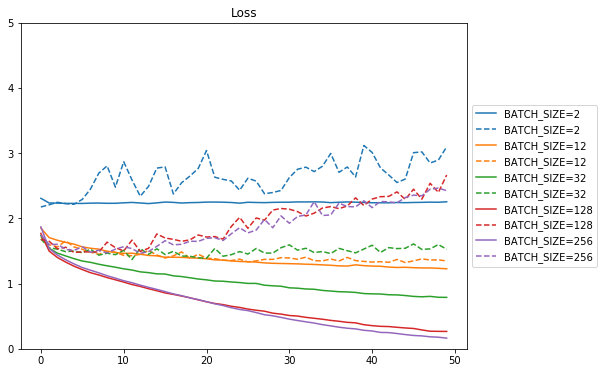

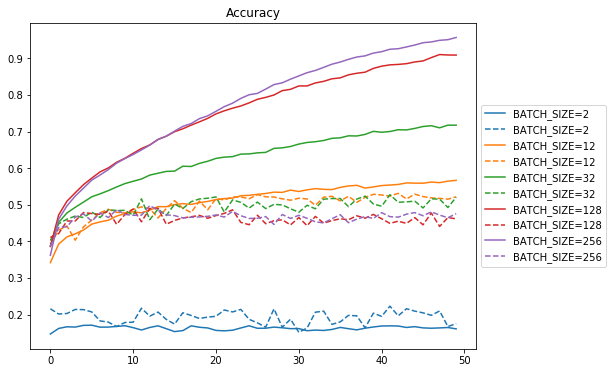

In [8]:
# 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['C0', 'C1', 'C2', 'C3', 'C4']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [12]:
# 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
def build_mlp_BN_before_Activation(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
# 請於 BN 放在 Input Layer 後，並比較結果
def build_mlp_BN_after_Input(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
model_CASE2 = build_mlp_BN_before_Activation(input_shape=x_train.shape[1:])
model_CASE2.summary()
model_CASE2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model_CASE2.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=256, 
              validation_data=(x_test, y_test), 
              shuffle=True)

# Collect results
train_loss_CASE2 = model_CASE2.history.history["loss"]
valid_loss_CASE2 = model_CASE2.history.history["val_loss"]
train_acc_CASE2 = model_CASE2.history.history["acc"]
valid_acc_CASE2 = model_CASE2.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
__________

Epoch 47/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.0391 - acc: 0.9964 - val_loss: 2.7604 - val_acc: 0.4617
Epoch 48/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.0383 - acc: 0.9965 - val_loss: 2.6777 - val_acc: 0.4685
Epoch 49/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.0383 - acc: 0.9958 - val_loss: 2.9455 - val_acc: 0.4426
Epoch 50/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.0382 - acc: 0.9956 - val_loss: 2.6576 - val_acc: 0.4843


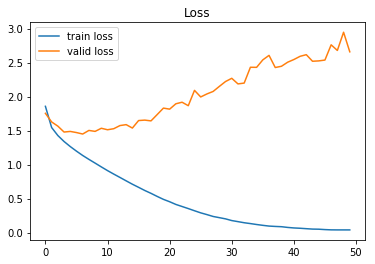

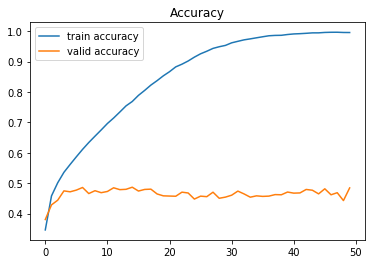

In [17]:
plt.plot(range(len(train_loss_CASE2)), train_loss_CASE2, label="train loss")
plt.plot(range(len(valid_loss_CASE2)), valid_loss_CASE2, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc_CASE2)), train_acc_CASE2, label="train accuracy")
plt.plot(range(len(valid_acc_CASE2)), valid_acc_CASE2, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [21]:
model_CASE3 = build_mlp_BN_after_Input(input_shape=x_train.shape[1:])
model_CASE3.summary()
model_CASE3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model_CASE3.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=256, 
              validation_data=(x_test, y_test), 
              shuffle=True)

# Collect results
train_loss_CASE3 = model_CASE3.history.history["loss"]
valid_loss_CASE3 = model_CASE3.history.history["val_loss"]
train_acc_CASE3 = model_CASE3.history.history["acc"]
valid_acc_CASE3 = model_CASE3.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 8s 151us/step - loss: 0.0315 - acc: 0.9960 - val_loss: 2.6747 - val_acc: 0.4981
Epoch 50/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.0362 - acc: 0.9944 - val_loss: 2.6932 - val_acc: 0.4976


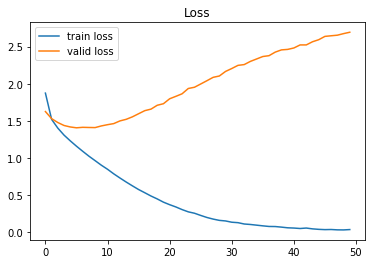

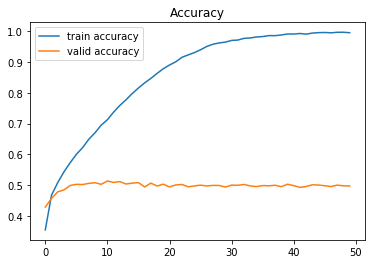

In [23]:
plt.plot(range(len(train_loss_CASE3)), train_loss_CASE3, label="train loss")
plt.plot(range(len(valid_loss_CASE3)), valid_loss_CASE3, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc_CASE3)), train_acc_CASE3, label="train accuracy")
plt.plot(range(len(valid_acc_CASE3)), valid_acc_CASE3, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()